<h1> Video Games Sale </h1>

### Import Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

In [113]:
df = pd.read_csv("https://raw.githubusercontent.com/fatemearyaie/VideoGameSale/main/vgsales.csv")

In [114]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [9]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
corr = df.corr()

<AxesSubplot:>

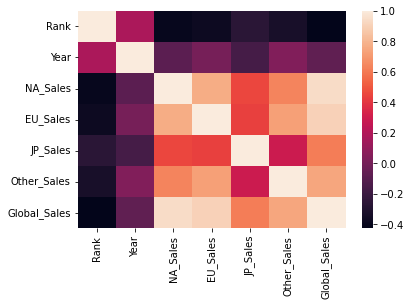

In [14]:
sns.heatmap(corr)

## Query:

In [15]:
from pandasql import sqldf

In [16]:
mysql = lambda q : sqldf(q, globals())

In [93]:
# Retrieve highest game's sale in global
mysql("SELECT Name,MAX(Global_Sales) AS maxGlobal FROM df")

,Name,maxGlobal
0,Wii Sports,82.74


In [92]:
# Retrieve lowest game's sale in global
mysql("SELECT Name, MIN(Global_Sales) AS minGlobal FROM df")

,Name,minGlobal
0,Turok,0.01


In [91]:
#Retrieve highest game's rank 
mysql("SELECT Name,MAX(Rank) AS maxGlobal FROM df")

,Name,maxGlobal
0,Spirits & Spells,16600


In [19]:
# Retrieve top 5 name,rank and year of games that have been published since 2016 and have a Rank above 1000
mysql("SELECT Name,Rank,Year FROM df WHERE Year>=2016 AND Rank>=1000 ORDER BY Rank LIMIT 5")

,Name,Rank,Year
0,Overwatch,1028,2016.0
1,No Man's Sky,1158,2016.0
2,Dark Souls III,1191,2016.0
3,FIFA 17,1226,2016.0
4,Doom (2016),1391,2016.0


In [99]:
# Retrieve the top 5 names and average rank where rank is greater than the average rank of all entries.
mysql("SELECT Name, AVG(Rank) FROM df GROUP BY Name HAVING Rank > (SELECT AVG(Rank) FROM df) LIMIT 5")

,Name,AVG(Rank)
0,.hack//G.U. Vol.1//Rebirth,8359.0
1,.hack//G.U. Vol.2//Reminisce (jp sales),8604.0
2,.hack//G.U. Vol.3//Redemption,8306.0
3,.hack//Link,9076.0
4,.hack: Sekai no Mukou ni + Versus,14279.0


In [21]:
#Retrieve the top 6 entries sorted by Rank, where the Genre is either Puzzle or Adventure.
mysql("SELECT * FROM df WHERE Genre='Puzzle' OR Genre='Adventure' ORDER BY Rank LIMIT 6")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
1,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
2,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
3,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
4,156,Tetris,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58
5,159,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55


In [89]:
# Retrieve Name, Platform, NASales, EUSales, JPSales, OtherSales, GlobalSales where the GlobalSale is between 30 and 100.
mysql("SELECT Name, Platform,NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales FROM df \
      WHERE Global_Sales BETWEEN 30 AND 100")

,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,11.38,9.23,6.50,2.90,30.01


In [108]:
# Retrieve the top 5 entries grouped by Publisher, where the Rank is greater than the average Rank of all entries
mysql("SELECT Name, Publisher, Rank FROM df GROUP BY Publisher HAVING Rank > (SELECT AVG(Rank) FROM df) LIMIT 5")

,Name,Publisher,Rank
0,Panzer Tactics,10TACLE Studios,12351
1,Men of War: Assault Squad,1C Company,13059
2,World of Goo,2D Boy,14013
3,Summer Athletics 2009,49Games,13579
4,Robotics;Notes,5pb,10383


In [78]:
#Create a pie chart using the Global_Sales for the slices and Platform for the labels.
px.pie(df, values='Global_Sales', names='Platform')

<AxesSubplot:>

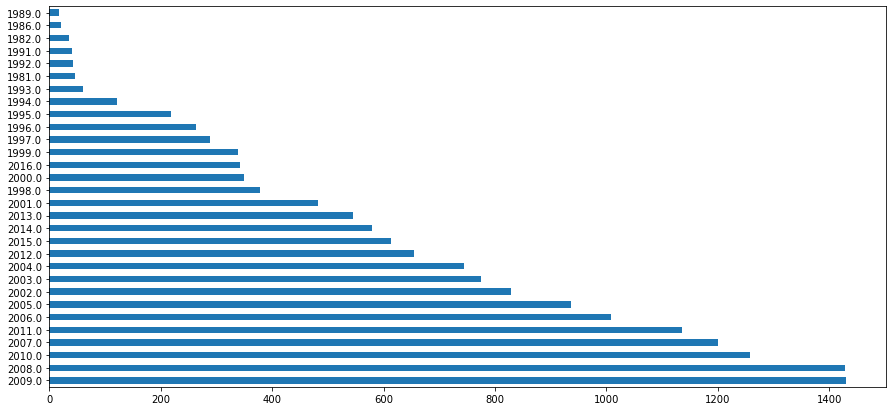

In [73]:
#Create a horizontal bar chart get the number of occurrences of each year, and limiting the chart to the top 30 values
df['Year'].value_counts().head(30).plot(kind='barh', figsize=(15,7))

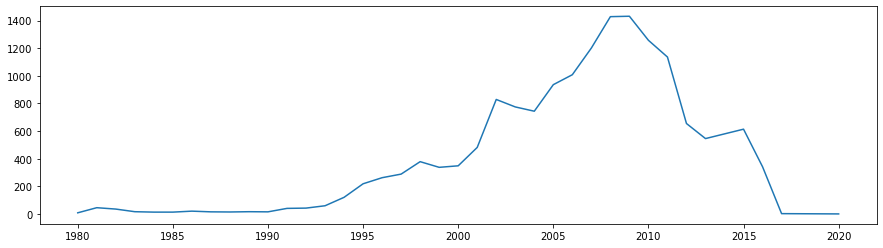

In [110]:
# Create a line plot get the number of occurrences of each year
plt.figure(figsize=(15,4))
plt.plot(df['Year'].value_counts().sort_index())

# Model Development

In [29]:
X = df[['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Y = df[['Global_Sales']]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=0.2)

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, Y_train)

LinearRegression()

In [49]:
prediction = lr.predict(X_test)

# Evaluation

In [50]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

In [51]:
print('R2: ',(r2_score(Y_test, prediction)))
print('MAE: ',(mean_absolute_error(Y_test, prediction)))
print('MSE: ',(mean_squared_error(Y_test, prediction)))

R2:  0.9999933287153024
MAE:  0.0031061418784745607
MSE:  2.8539540789499613e-05


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:ylabel='Density'>

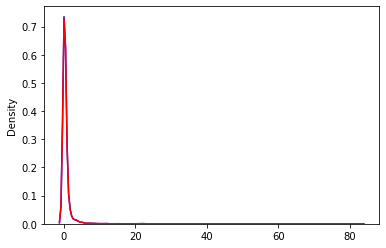

In [52]:
ax1 = sns.distplot(Y_test, hist=False, color='b')
sns.distplot(prediction, hist=False, ax=ax1, color='r')